In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [149]:
simplreg = pd.read_csv("datasets/simplreg.txt", delimiter="\t")
fruitohms = pd.read_csv("datasets/fruitohms.txt", delimiter=" ")

print(simplreg)
print(simplreg.info())
print(simplreg.describe())
print("\n")
print(fruitohms)
print(fruitohms.info())
print(fruitohms.describe())

     X      Y
0   25  350.0
1   30  348.4
2   35  337.0
3   40  330.8
4   45  315.8
5   50  305.4
6   55  280.7
7   60  248.0
8   65  230.4
9   70  202.3
10  75  162.5
11  80  126.0
12  85   74.6
13  90   28.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       14 non-null     int64  
 1   Y       14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes
None
               X           Y
count  14.000000   14.000000
mean   57.500000  238.607143
std    20.916501  105.896593
min    25.000000   28.600000
25%    41.250000  172.450000
50%    57.500000  264.350000
75%    73.750000  327.050000
max    90.000000  350.000000


     juice  ohms
1      4.0  4860
2      5.0  5860
3      5.5  6650
4      7.5  7050
5      8.5  5960
..     ...   ...
123   58.5  3650
124   58.5  3750
125   58.5  4550
126   59.5  3300
127   60.0  3600

[128 rows x 

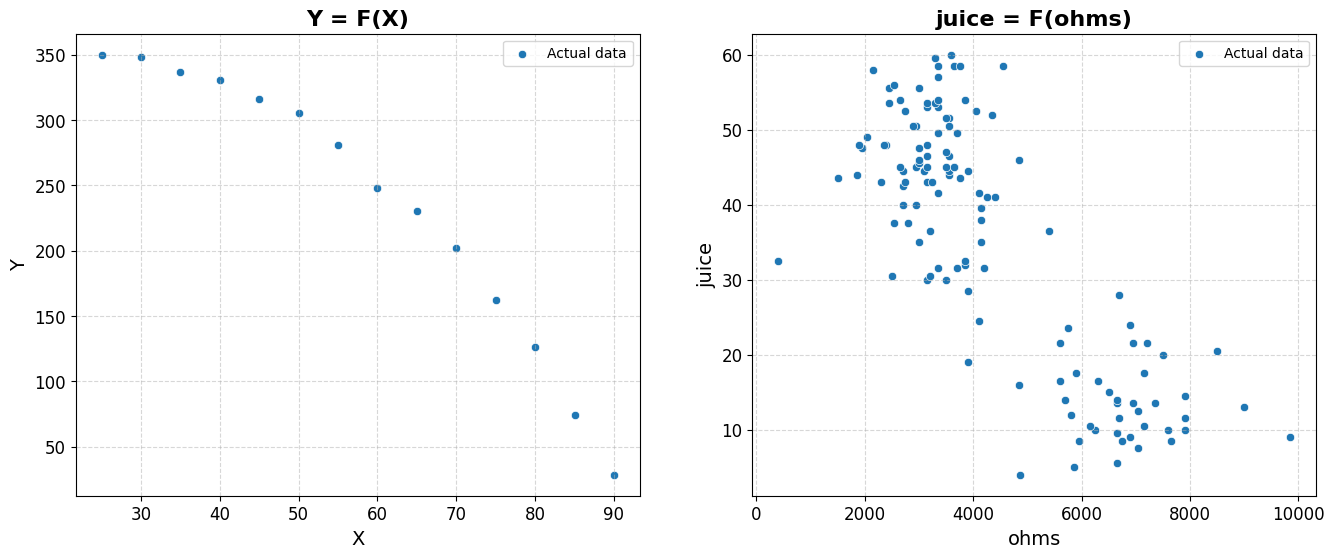

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=simplreg["X"], y=simplreg["Y"], ax=ax1, label="Actual data")
ax1.set_xlabel("X", fontsize=14)
ax1.set_ylabel("Y", fontsize=14)
ax1.set_title("Y = F(X)", fontsize=16, fontweight="bold")
ax1.tick_params(axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)
ax1.grid(True, linestyle="--", alpha=0.5)

sns.scatterplot(x=fruitohms["ohms"], y=fruitohms["juice"], ax=ax2, label="Actual data")
ax2.set_xlabel("ohms", fontsize=14)
ax2.set_ylabel("juice", fontsize=14)
ax2.set_title("juice = F(ohms)", fontsize=16, fontweight="bold")
ax2.tick_params(axis="x", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)
ax2.grid(True, linestyle="--", alpha=0.5)

plt.savefig("graph1.png")
plt.show()

Linear Regression MSE: 1035.8, RMSE: 32.184, MAE: 26.869, R2: 0.904


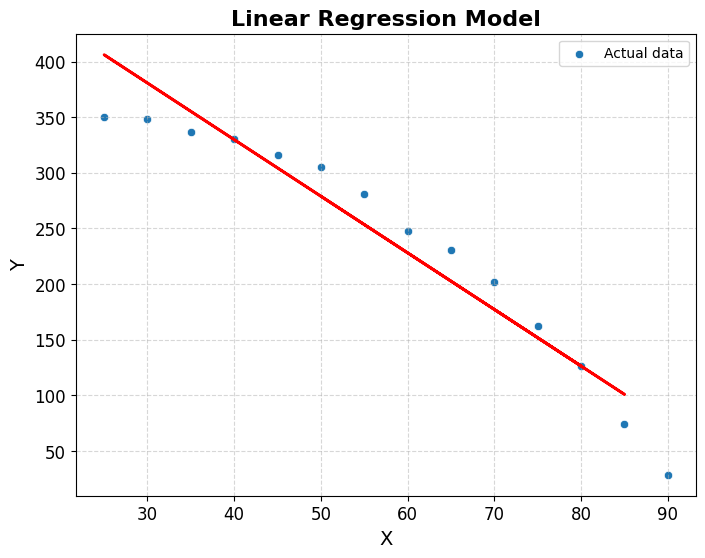

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     98.15
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           2.28e-05
Time:                        13:37:17   Log-Likelihood:                -41.820
No. Observations:                   9   AIC:                             87.64
Df Residuals:                       7   BIC:                             88.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        533.4568     29.815     17.892      0.0

c:\Users\ondre\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


In [151]:
X = simplreg["X"].values.reshape(-1, 1)
y = simplreg["Y"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)

print(
    f"Linear Regression MSE: {np.round(mse_lin,3)}, RMSE: {np.round(rmse_lin,3)}, MAE: {np.round(mae_lin,3)}, R2: {np.round(r2_lin,3)}"
)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=simplreg["X"], y=simplreg["Y"], label="Actual data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Linear Regression")
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.title("Linear Regression Model", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Statistical evaluation of the linear model
X_train_const = sm.add_constant(X_train)
model_lin = sm.OLS(y_train, X_train_const).fit()
summary_lin = model_lin.summary()
print(summary_lin)

print("Coefficients (Linear Regression):", lin_reg.coef_)
print("Intercept (Linear Regression):", lin_reg.intercept_)

In [152]:
def get_optimal_degree(x_train, x_test, y_train, y_test):
    degrees = [2, 3, 4, 5]
    errors = []

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(x_train)
        X_poly_test = poly.transform(x_test)

        poly_reg = LinearRegression()
        poly_reg.fit(X_poly_train, y_train)

        y_poly_pred = poly_reg.predict(X_poly_test)
        mse_poly = mean_squared_error(y_test, y_poly_pred)
        errors.append(mse_poly)

    return degrees[np.argmin(errors)]

In [153]:
optimal_degree = get_optimal_degree(X_train, X_test, y_train, y_test)
print(f"Optimal degree for polynomial regression: {optimal_degree}")

poly = PolynomialFeatures(degree=optimal_degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_poly_pred = poly_reg.predict(X_poly_test)

mse_poly = mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(
    f"Polynomial Regression MSE: {np.round(mse_poly,3)}, RMSE: {np.round(rmse_poly,3)}, MAE: {np.round(mae_poly,3)}, R2: {np.round(r2_poly,3)}"
)

Optimal degree for polynomial regression: 4
Polynomial Regression MSE: 21.997, RMSE: 4.69, MAE: 4.025, R2: 0.998


In [154]:
def plot_models(x_axis, y_axis):
    X = x_axis.values.reshape(-1, 1)
    y = y_axis.values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    degrees = [2, 3, 4, 5]
    colors = ["green", "darkblue", "magenta", "grey"]

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.ravel()

    for idx, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree)
        X_poly_train = poly.fit_transform(X_train)

        poly_reg = LinearRegression()
        poly_reg.fit(X_poly_train, y_train)

        X_grid = np.linspace(min(X), max(X), 100).reshape(-1, 1)
        X_poly_grid = poly.transform(X_grid)
        y_poly_grid = poly_reg.predict(X_poly_grid)

        y_pred = poly_reg.predict(poly.transform(X_test))

        mse_lin = mean_squared_error(y_test, y_pred)
        rmse_lin = np.sqrt(mse_lin)
        mae_lin = mean_absolute_error(y_test, y_pred)
        r2_lin = r2_score(y_test, y_pred)

        sns.scatterplot(x=x_axis, y=y_axis, label="Actual data", ax=axs[idx])
        axs[idx].plot(
            X_grid,
            y_poly_grid,
            color=colors[idx],
            linewidth=2,
            label=f"Regression (degree={degree})",
        )
        axs[idx].set_title(
            f"Regression (degree={degree})", fontsize=14, fontweight="bold"
        )
        axs[idx].grid(True, linestyle="--", alpha=0.5)
        axs[idx].legend()
        axs[idx].text(
            0.81,
            0.69,
            f"MSE: {np.round(mse_lin, 3)}\nRMSE: {np.round(rmse_lin, 3)}\nMAE: {np.round(mae_lin, 3)}\nR²: {np.round(r2_lin, 3)}",
            transform=axs[idx].transAxes,
            fontsize=10,
            verticalalignment="bottom",
            horizontalalignment="left",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
        )

    plt.tight_layout()
    plt.savefig(f"graph2-{x_axis.name}_{y_axis.name}.png")
    plt.show()

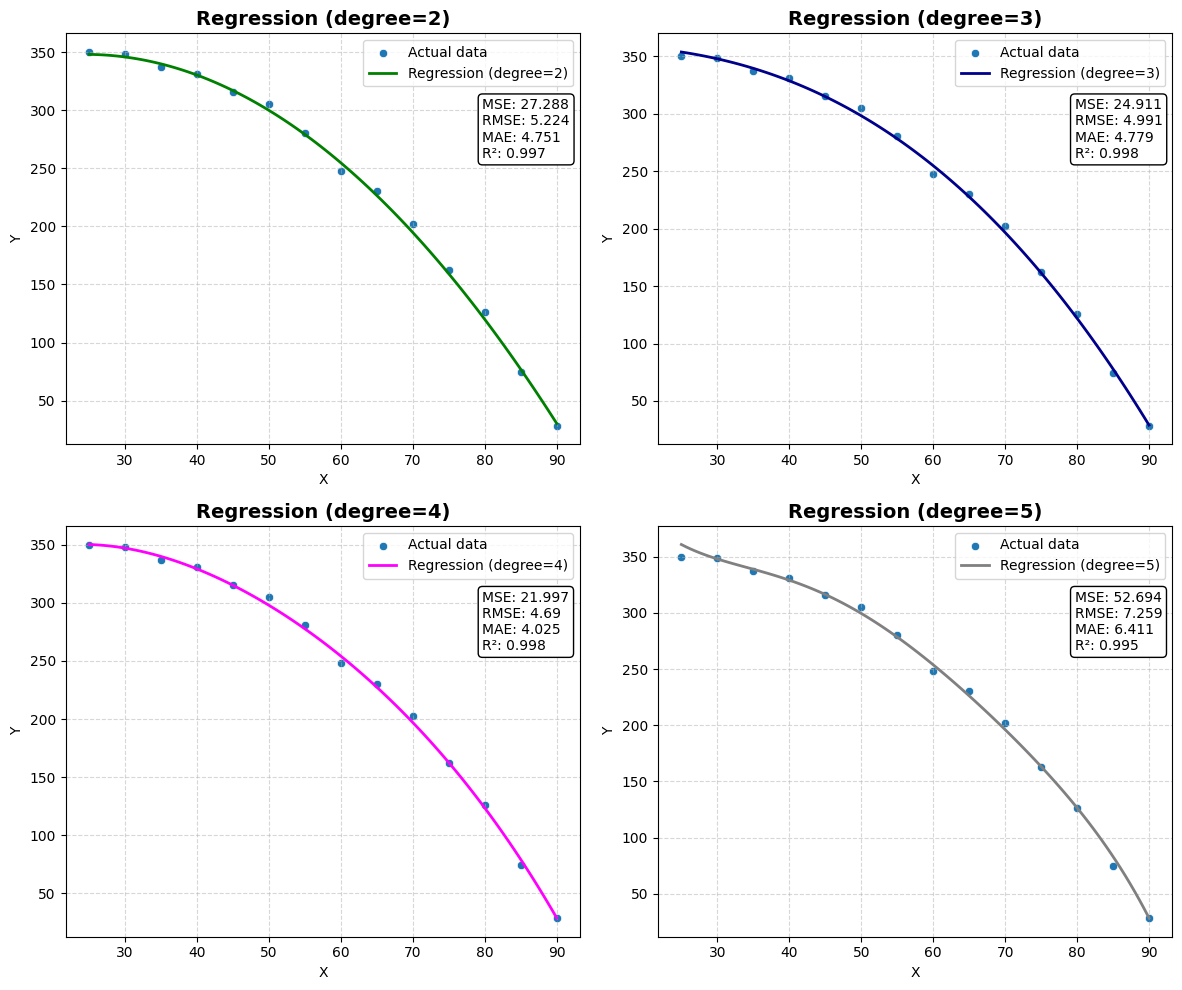

In [155]:
plot_models(x_axis=simplreg["X"], y_axis=simplreg["Y"])

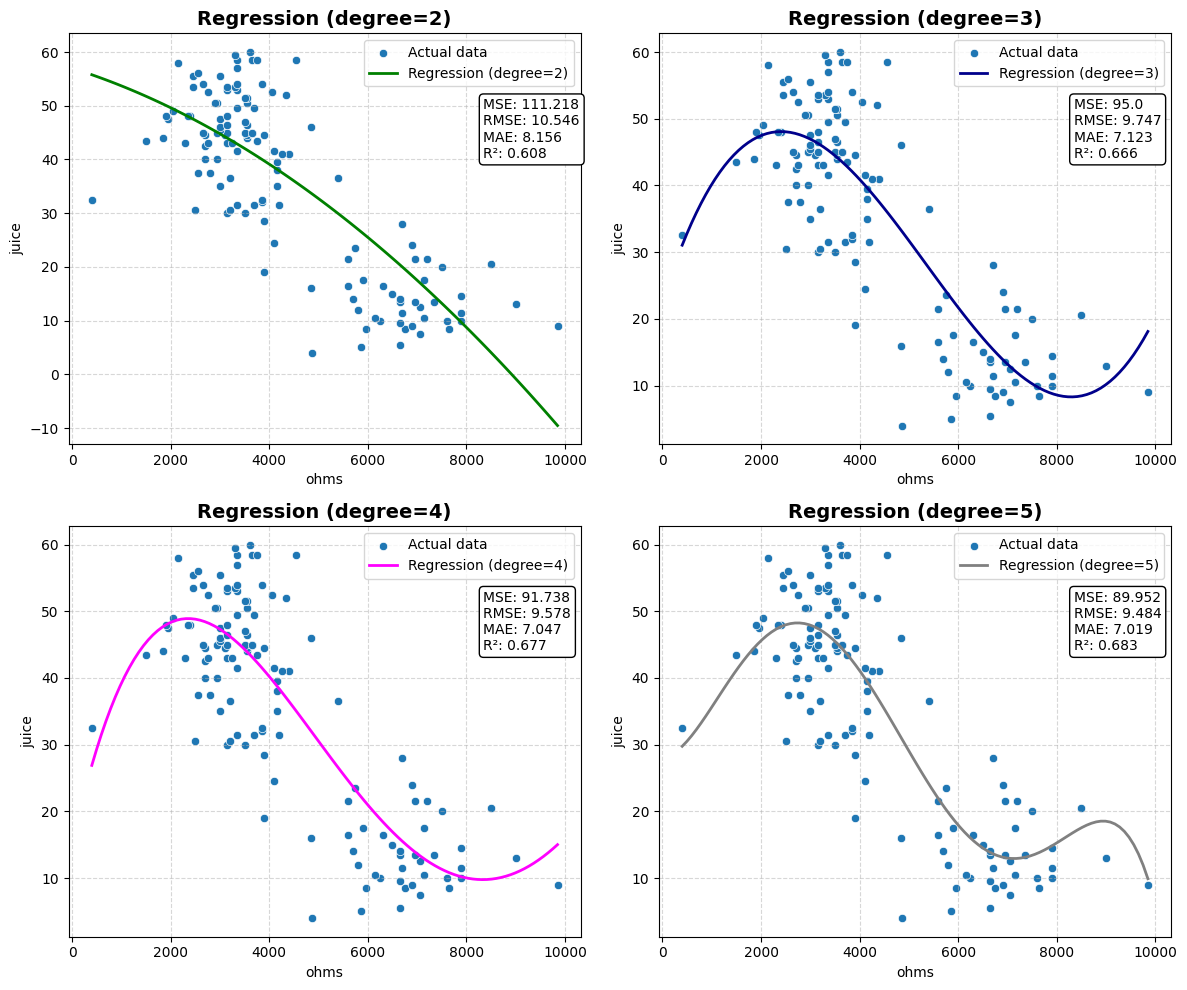

In [156]:
plot_models(x_axis=fruitohms["ohms"], y_axis=fruitohms["juice"])